# Validation of NISAR Requirement L2-SCI-667: Ice sheet and glacier velocity measurement - slow deformation
---

## Introduction
This notebook documents and executes a process to validate the NISAR slow ice deformation requirement, which is specified as:

*The NISAR Project shall measure ice sheet (> 90% coverage, including both poles) and glaciers and ice-caps (> 80% coverage) horizontal velocity each cold season to an accuracy
 better than the sum of 3% of the horizontal velocity magnitude and 1 m/yr (1-sigma), at 100-m resolution in areas of slow deformation (< 50 m/yr).
 
As described below this process amounts to comparing L3 velocity products generated as described in the NISAR ATBD with points of known velocity and elevations. Specifically, the Cal/Val points will consist of:
* Zero velocity points on exposed bedrock; and
* On-ice GPS measurements of ice flow speed ($v_x$,$v_y$) and elevation ($z$).

## Validation process
Standard statistical measurements as described below will be used to determine whether the requirement has been met.

### Setup
Import necessary libraries. 

In [1]:
import nisarfunc as n
import matplotlib.pylab as plt 
from IPython.display import Markdown as md

The `nisarfunc` package contains two main classes. 
* `nisarVel` to read and interpolate L3 nisar velocity products.
* `cvPoints` to read, filter, and analyse cal/val points in conjunction with velocity data.

Start by calling `nisarVel` to read in an L3 product and setup the interpolators.

In [2]:
myVel=n.nisarVel()
myVel.readProduct('Vel-2018-01-01.2018-12-31/release//GL_vel_mosaic_Annual_01Jan18_31Dec18_*_v02.0')
myVel.setupInterp()

True
['Vel-2018-01-01.2018-12-31/release//GL_vel_mosaic_Annual_01Jan18_31Dec18_vx_v02.0.tif', 'Vel-2018-01-01.2018-12-31/release//GL_vel_mosaic_Annual_01Jan18_31Dec18_vy_v02.0.tif']
read time 0:00:02.489805
read time 0:00:02.426157


Next, the cal/val points are read into a `cvPoints` object. 

In [3]:
myCVPts=n.cvPoints(cvFile='/Users/ian/tiepoints/TiepointsGL.ll.culled')

Using these results, the locations of the cal/val points relative to the velocity map shown below with:
* bed rock points in blue;
* slow moving interior points in red; and
* faster moving points in yellow ($|\vec{v})| > 20)$.

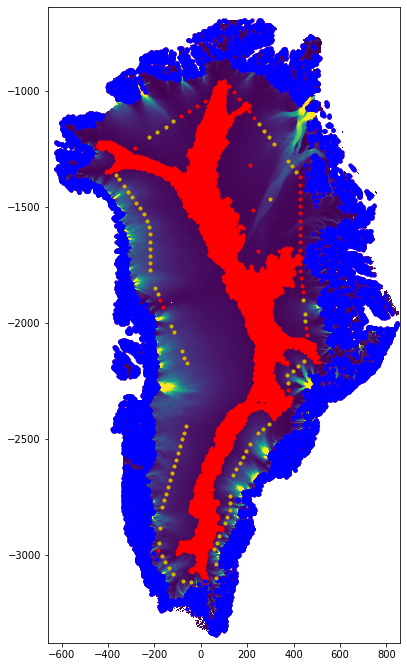

In [4]:
axImage=myVel.displayVel()
myCVPts.plotAllCVLocs(vel=myVel,ax=axImage,color='r',marker='.')
myCVPts.plotZeroCVLocs(vel=myVel,ax=axImage,color='b',marker='.')
myCVPts.plotVRangeCVLocs(20,1000,vel=myVel,ax=axImage,color='y',marker='.')

**Map of velocity with Cal/Val Points as described above.**

### Computation of Errors 

Errors are evaluated as the means ($\mu_x,\mu_y$) and standard deviations ($\sigma_x,\sigma_y$) of the diferences between the measured velocity ($u_x,u_y$) and the cal/val points. Explicitly, these calculations are:

$\bar{\mu}_x = \frac{1}{N_{pts}}\sum_{i=1}^{N_{pts}} (u_x-v_x)$, &nbsp;&nbsp;&nbsp;       $\bar{\mu}_y = \frac{1}{N_{pts}}\sum_{i=1}^{N_{pts}} (u_x-v_x)$) </br>
$\hat{\sigma}_x^2 = \frac{1}{N_{pts}-1}\sum_{i=1}^{N_{pts}} ((u_x-v_x)-\bar{\mu_x})^2$, &nbsp;&nbsp;&nbsp;    $\hat{\sigma}_y^2 = \frac{1}{N_{pts}-1}\sum_{i=1}^{N_{pts}} ((u_y-v_y)-\bar{\mu_y})^2$ 

For the bedrock points the nominal errors are ::

In [5]:
mux0,muy0,sigx0,sigy0,ngood,myTab0=myCVPts.zeroStats(myVel,table=True)
myTab0

|Statistic | $u_x-v_x$ (m/yr)|$u_y-v_y$ (m/yr)| N points|
|-----|---------|---------|----|
|Mean| -0.016|-0.15| 31635|
|Std.Dev.| 2.1|4.2| 31635|

The residual differences are:

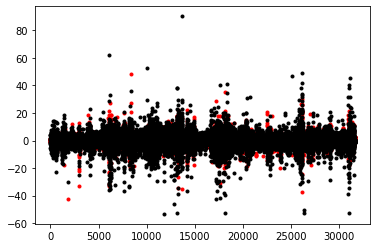

In [6]:
vx0,vy0,vv0,iGood=myCVPts.zeroVData(myVel)
plt.plot(vx0[iGood],'r.')
plt.plot(vy0[iGood],'k.')

For the slow moving points the nominal errors are :

In [10]:
muxSlow,muySlow,sigxSlow,sigySlow,ngoodSlow,myTabSlow=myCVPts.vRangeStats(myVel,0,20,table=True)
myTabSlow

|Statistic | $u_x-v_x$ (m/yr)|$u_y-v_y$ (m/yr)| N points|
|-----|---------|---------|----|
|Mean| -0.061|-0.12| 39025|
|Std.Dev.| 2.0|3.9| 39025|

For the faster moving points the nominal errors are :

In [11]:
muxFast,muyFast,sigxFast,sigyFast,ngoodFast,myTabFast=myCVPts.vRangeStats(myVel,20,1000,table=True)
myTabFast

|Statistic | $u_x-v_x$ (m/yr)|$u_y-v_y$ (m/yr)| N points|
|-----|---------|---------|----|
|Mean| -0.72|-0.49| 84|
|Std.Dev.| 2.8|3.1| 84|